In [ ]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import silhouette_score

from cv2 import kmeans, TERM_CRITERIA_MAX_ITER, TERM_CRITERIA_EPS, KMEANS_RANDOM_CENTERS
from numpy import float32
from matplotlib.pyplot import scatter, show
from sklearn.datasets import make_blobs

In [ ]:
image = cv2.imread('sample2.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
# Reshape the image to a 2D array of pixels and 3 color values (RGB)
pixels = image.reshape(-1, 3)
print(pixels)

[[255 255 255]
 [254 254 254]
 [255 255 255]
 ...
 [255 255 255]
 [255 255 255]
 [251 251 251]]


In [ ]:
# Apply K-Means clustering to find 2 clusters (green and red dots)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pixels)



KMeans(n_clusters=3, random_state=42)

In [ ]:
# Replace each pixel with its corresponding cluster center
segmented_image = kmeans.cluster_centers_[kmeans.labels_].astype('uint8')
segmented_image = segmented_image.reshape(image.shape)


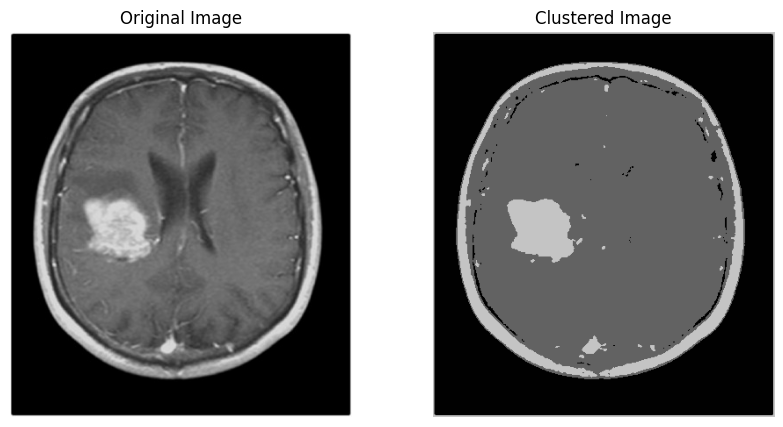

In [ ]:
# Display the original and clustered image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Clustered Image')
plt.imshow(segmented_image)
plt.axis('off')

plt.show()





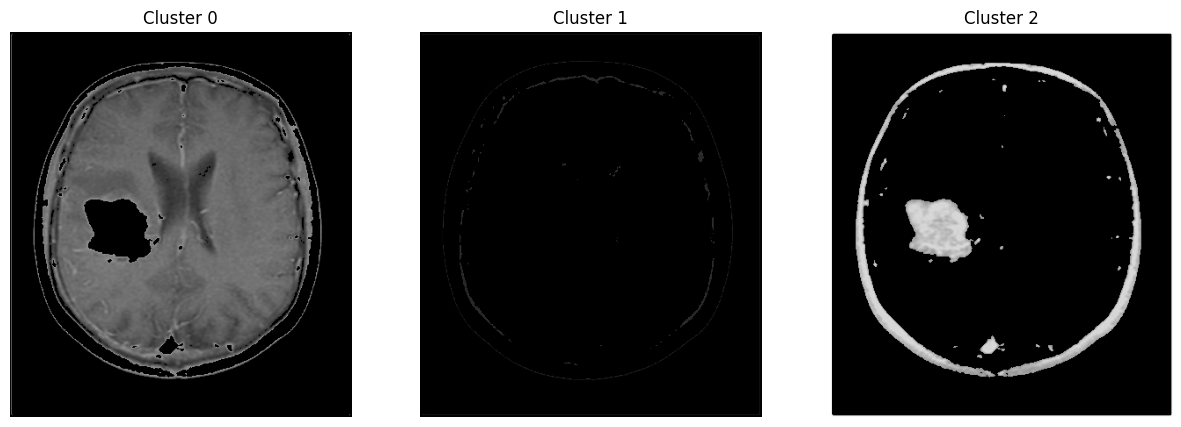

In [ ]:
pixels = image.reshape(-1, 3)


scaler = MinMaxScaler()
pixels_scaled = scaler.fit_transform(pixels)

k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(pixels_scaled)


labels = kmeans.labels_


fig, axes = plt.subplots(1, k, figsize=(15, 5))

for cluster_id in range(k):
    cluster_image = np.zeros_like(pixels)
    cluster_image[labels == cluster_id] = pixels[labels == cluster_id]
    cluster_image = cluster_image.reshape(image.shape)
    axes[cluster_id].imshow(cluster_image)
    axes[cluster_id].set_title(f"Cluster {cluster_id}")
    axes[cluster_id].axis("off")

plt.show()

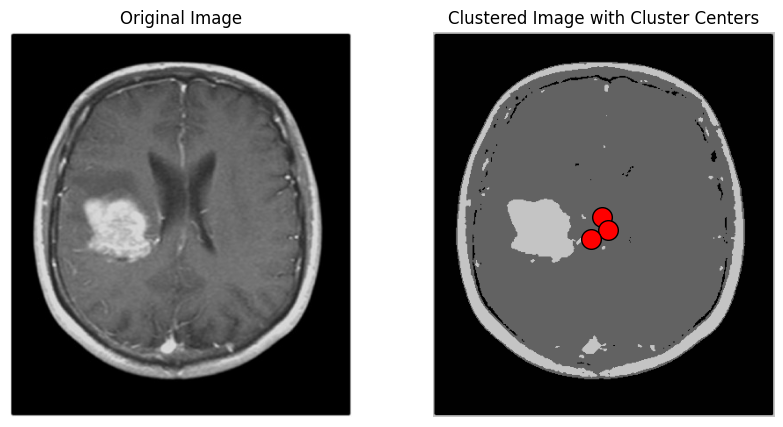

In [ ]:

# Display the original and clustered image with cluster centers marked
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

# Clustered Image with Red Dots for Cluster Centers
plt.subplot(1, 2, 2)
plt.title('Clustered Image with Cluster Centers')
plt.imshow(segmented_image)
plt.axis('off')

# Overlay red dots for cluster centers
height, width, _ = image.shape
for idx, label in enumerate(np.unique(kmeans.labels_)):
    # Place red dots at the mean positions (approximated for visualization)
    mask = np.where(kmeans.labels_.reshape((height, width)) == idx)
    if len(mask[0]) > 0:  # Ensure there are pixels in this cluster
        avg_x = np.mean(mask[1])  # Average X-coordinate in this cluster
        avg_y = np.mean(mask[0])  # Average Y-coordinate in this cluster
        plt.scatter(avg_x, avg_y, c='red', s=200, edgecolors='black', label=f"Center {idx}")


# 2nd Exammple

**Gaussian Mixture Models (GMMs)** are a probabilistic clustering technique that assumes data points belong to multiple clusters with varying probabilities, allowing for flexible and soft cluster boundaries, unlike hard clustering methods like k-means.


Probabilistic Clustering:
GMMs assign probabilities to each data point belonging to each cluster, rather than assigning them to a single, definitive cluster.

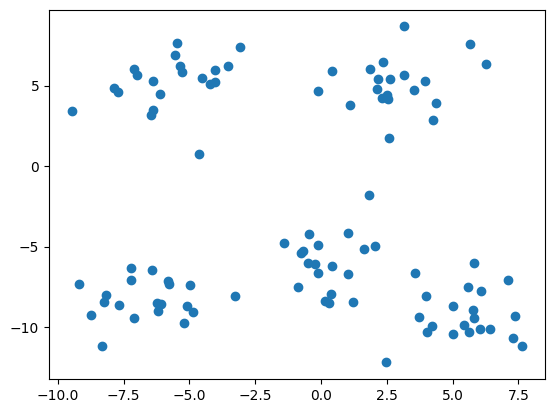

In [ ]:

# Generating a dataset of 2D data points and their ground truth labels
x, y_true = make_blobs(n_samples=100, centers=5, cluster_std=1.5, random_state=10)

# Plotting the dataset
normalplt=plt.scatter(x[:, 0], x[:, 1])


**The compactness of each cluster, computed as the sum of the squared distance of each data point to its corresponding cluster center. A smaller compactness value indicates that the data points are distributed closer to their corresponding cluster center and, hence, the cluster is more compact.**

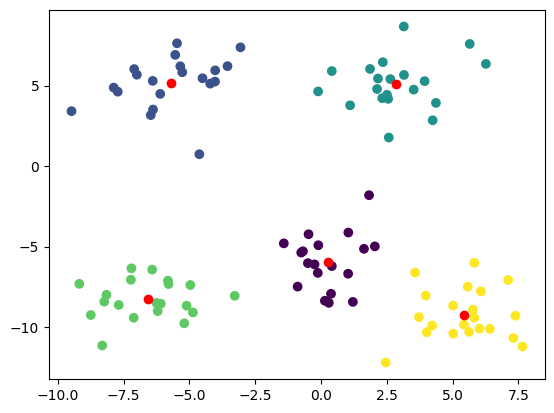

In [ ]:
# Specify the algorithm's termination criteria
criteria = (cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS, 10, 1.0)

# Run the k-means clustering algorithm on the input data
compactness, y_pred, centers = cv2.kmeans(data=x.astype(np.float32), K=5, bestLabels=None, criteria=criteria, attempts=10, flags=cv2.KMEANS_RANDOM_CENTERS)

# Plot the data clusters, each having a different color, together with the corresponding cluster centers
plt.scatter(x[:, 0], x[:, 1], c=y_pred)
finalplt=plt.scatter(centers[:, 0], centers[:, 1], c='red')
finalplt

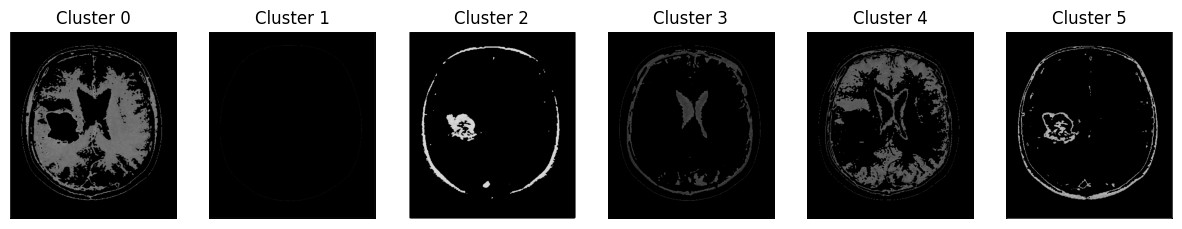

In [ ]:
pixels = image.reshape(-1, 3)


scaler = MinMaxScaler()
pixels_scaled = scaler.fit_transform(pixels)

k = 6
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(pixels_scaled)


labels = kmeans.labels_


fig, axes = plt.subplots(1, k, figsize=(15, 5))

for cluster_id in range(k):
    cluster_image = np.zeros_like(pixels)
    cluster_image[labels == cluster_id] = pixels[labels == cluster_id]
    cluster_image = cluster_image.reshape(image.shape)
    axes[cluster_id].imshow(cluster_image)
    axes[cluster_id].set_title(f"Cluster {cluster_id}")
    axes[cluster_id].axis("off")

plt.show()

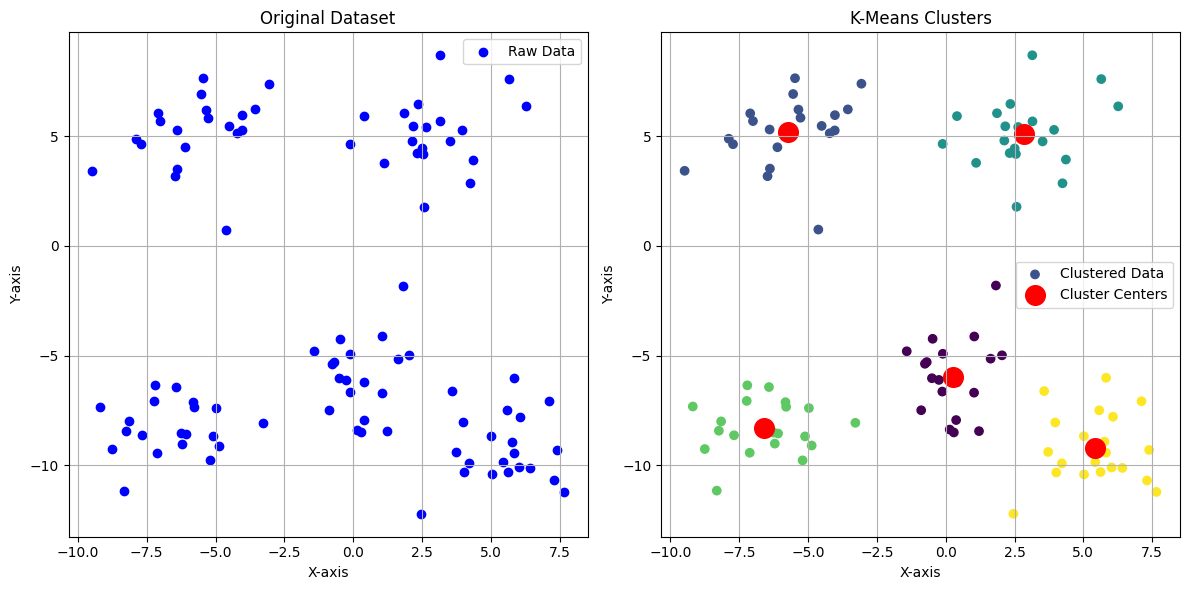

In [ ]:

# Create side-by-side subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot the dataset on the first subplot
ax[0].scatter(x[:, 0], x[:, 1], c='blue', label="Raw Data")
ax[0].set_title("Original Dataset")
ax[0].set_xlabel("X-axis")
ax[0].set_ylabel("Y-axis")
ax[0].legend()
ax[0].grid(True)

# Plot the clustered data on the second subplot
ax[1].scatter(x[:, 0], x[:, 1], c=y_pred, cmap='viridis', label="Clustered Data")
ax[1].scatter(centers[:, 0], centers[:, 1], c='red', s=200, label="Cluster Centers")
ax[1].set_title("K-Means Clusters")
ax[1].set_xlabel("X-axis")
ax[1].set_ylabel("Y-axis")
ax[1].legend()
ax[1].grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [ ]:
# Perform clustering with KMeans
# compactness, y_pred, centers = kmeans(data=x.astype(float32), K=5, bestLabels=None, criteria=criteria, attempts=10, flags=KMEANS_RANDOM_CENTERS)
# Instead of calling kmeans (which is an object now), you need to call cv2.kmeans
compactness, y_pred, centers = cv2.kmeans(data=x.astype(np.float32), K=5, bestLabels=None, criteria=criteria, attempts=10, flags=cv2.KMEANS_RANDOM_CENTERS)


# Calculate Silhouette Score
for n_clusters in range(2, 11):
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)
    # Changed X to x
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.5560652981161652
For n_clusters = 3 The average silhouette_score is : 0.5704752674677053
For n_clusters = 4 The average silhouette_score is : 0.6171960281678492
For n_clusters = 5 The average silhouette_score is : 0.633405917207741
For n_clusters = 6 The average silhouette_score is : 0.5896987183658154
For n_clusters = 7 The average silhouette_score is : 0.5406780951167786
For n_clusters = 8 The average silhouette_score is : 0.47469381174344233
For n_clusters = 9 The average silhouette_score is : 0.44412548600498214
For n_clusters = 10 The average silhouette_score is : 0.39922459731112236
